In [1]:
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [2]:
model = Word2Vec(LineSentence("moby-dick.txt"), size=200, window=5, min_count=3, workers=8)
model.init_sims(replace=True)
model.save("wiki.en.word2vec.model")

In [3]:
for i in model.wv.vocab:
  print(i)

Выходные данные были обрезаны до нескольких последних строк (5000).
Ground
bows
Japan,
sideways
surprised
scene,
wondering
incredulous
countenance.
person
present
notice
read,
therefore,
reading
frigid
wall.
names
appeared
congregation,
not;
accidents
fishery,
wear
countenance
caused
afresh.
Oh!
buried
despair
immovable
deadly
beings
perished
here.
census
mankind
proverb
secrets
yesterday
significant
infidel
earth;
eternal,
hopeless
antique
Adam
died
centuries
ago;
nevertheless
maintain
unspeakable
dead;
meanings.
feeds
doubts
vital
hope.
scarcely
told,
read
fate
grew
merry
immortal
then?
Methinks
mistaken
shadow
substance.
oysters
lees
being.
fact
will,
therefore
stave
Jove
venerable
sufficiently
Father
Mapple
hardy
gleams
history,
behold
utmost
maritime
observed
carried
fashioned
height
would,
seriously
area
seemed,
hint
finished
pulpit
stairs,
ladder,
mounting
wife
captain
provided
handsome
means
taste.
grasping
cast
upwards,
truly
ascending
usually
rope,
wood,
step
pulpit,
joints
i

In [4]:
print(model.wv.most_similar('see', topn=3))
print(model.wv['see'])

[('say', 0.9999265074729919), ('find', 0.9999159574508667), ('tell', 0.9999032020568848)]
[-0.09656515 -0.0951267   0.09319646 -0.01197323  0.04709115  0.03204233
 -0.09491648 -0.03928734  0.0461535   0.00289682 -0.03817981 -0.02649919
 -0.14520456 -0.07840114 -0.08427025  0.1723533   0.00231735  0.04268727
  0.03084194  0.05656279 -0.12149846 -0.02845532 -0.01741871  0.13025402
 -0.13415629 -0.01337292  0.02372135  0.11544918  0.05934267 -0.10048524
 -0.05053852  0.0251481  -0.04377731 -0.07417898  0.05641373  0.04980382
  0.09993722  0.05609849 -0.04351716 -0.07331474  0.05843199  0.07871143
  0.01068403  0.13193765  0.1135201   0.02033722 -0.01994472  0.04163796
  0.05528554  0.00527338  0.00611991  0.03183636  0.02313217  0.14659603
  0.06289598 -0.14456464  0.10050064 -0.05729437  0.05313046 -0.00876376
  0.11480604  0.04482519  0.04549802 -0.02486587 -0.06303014 -0.00237864
 -0.06799898  0.02736071  0.01728294  0.08455735 -0.08408781  0.13054621
 -0.00178053  0.07637528 -0.115798

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, random_state=0)
data = []
for i in model.wv.vocab:
  data.append(model.wv[i])
keke = tsne.fit_transform(data)
print(data)
print("!!!")
print(keke)
#plt.scatter(keke)
#plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
!pip install pyconll
!pip install spacy
!pip install spacy_udpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 4.6 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp38-cp38-linux_x86_64.whl size=5626964 sha256=8fcc3f348fa67df34ed4bd27403cefdf971302080e9f75007fe93cf8b45aea7c
  Stored in directory: /root/.cache/pip/wheels/d4/c1/67/142cea91540458ab9edac9c280a19b549a03217d7b441d32a6
Successfully built ufal.udpipe


In [8]:
#import sys
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
import pyconll

In [9]:
!mkdir ./datasets/
!wget -O ./datasets/ru_syntagrus-ud-train.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
!wget -O ./datasets/ru_syntagrus-ud-dev.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu

--2022-12-01 02:04:10--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train-a.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40736581 (39M) [text/plain]
Saving to: ‘./datasets/ru_syntagrus-ud-train.conllu’

./datasets/ru_synta 100%[===================>]  38.85M   168MB/s    in 0.2s    

2022-12-01 02:04:10 (168 MB/s) - ‘./datasets/ru_syntagrus-ud-train.conllu’ saved [40736581/40736581]

--2022-12-01 02:04:10--  https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [10]:
full_train = pyconll.load_from_file('./datasets/ru_syntagrus-ud-train.conllu')
full_test = pyconll.load_from_file('./datasets/ru_syntagrus-ud-dev.conllu')

In [12]:
MAX_SENT_LEN=0
MAX_ORIG_TOKEN_LEN = max(len(token.form) for sent in full_train for token in sent)
MAX_ORIG_TOKEN_LEN2 = max([len(str(token.form)) for sent in full_test for token in sent])
if(MAX_ORIG_TOKEN_LEN2>MAX_ORIG_TOKEN_LEN):
 MAX_ORIG_TOKEN_LEN=MAX_ORIG_TOKEN_LEN2
print('Наибольшая длина токена', MAX_ORIG_TOKEN_LEN)

Наибольшая длина токена 31


In [16]:
import re
import numpy as np

In [18]:
# quit()
def parse_words(sent2):
    return re.split(r'\W+',sent2.lower())
def parse_chars(sent2):
    return list(sent2.lower())
all_train_texts = [' '.join(token.form for token in sent) for sent in full_train]
train_char_tokenized = [parse_chars(sent) for sent in all_train_texts]
concat_chars = [j for i in train_char_tokenized for j in i]
unique_chars=set(concat_chars)
MAX_UNIQUE_CHARS=len(unique_chars)
char_vocab={s:i for i,s in enumerate(unique_chars)}
print(char_vocab)

{'b': 0, 'д': 1, '°': 2, 'з': 3, '5': 4, '.': 5, 'r': 6, ':': 7, 'к': 8, 'ц': 9, '№': 10, '8': 11, 'б': 12, 'u': 13, '0': 14, 'd': 15, ' ': 16, '(': 17, 'р': 18, 'ю': 19, 'w': 20, 'и': 21, 't': 22, 'l': 23, '/': 24, 'ш': 25, '&': 26, '6': 27, 'в': 28, '€': 29, 'о': 30, 'у': 31, 'х': 32, 'n': 33, 'м': 34, '*': 35, 'p': 36, 'т': 37, '4': 38, '9': 39, '-': 40, '7': 41, '2': 42, 'с': 43, ',': 44, '1': 45, 'a': 46, 'e': 47, 'c': 48, 'й': 49, '!': 50, 'o': 51, '%': 52, 'y': 53, 'ч': 54, 'h': 55, 'а': 56, '_': 57, 'z': 58, 'q': 59, '$': 60, 'k': 61, 'я': 62, 'f': 63, '…': 64, 'ж': 65, 'е': 66, 'щ': 67, 'i': 68, 'x': 69, '?': 70, 'э': 71, "'": 72, '3': 73, 'ь': 74, 'ъ': 75, 'g': 76, '"': 77, 'ё': 78, 'm': 79, 'v': 80, '+': 81, 'j': 82, 's': 83, 'л': 84, ')': 85, 'п': 86, 'ы': 87, ';': 88, 'ф': 89, 'н': 90, 'г': 91}


In [19]:
UNIQUE_TAGS = ['<NOTAG>'] + sorted({token.upos for sent in full_train for token in sent if token.upos})
label2id = {label: i for i, label in enumerate(UNIQUE_TAGS)}
MAX_UNIQUE_TAGS=len(UNIQUE_TAGS)

#revert dictionaries
id2label=dict()
for i,val in label2id.items():
 id2label[val]=i 
vocab_char=dict()
for i,val in char_vocab.items():
 vocab_char[val]=i 
id2label

{0: '<NOTAG>',
 1: 'ADJ',
 2: 'ADP',
 3: 'ADV',
 4: 'AUX',
 5: 'CCONJ',
 6: 'DET',
 7: 'INTJ',
 8: 'NOUN',
 9: 'NUM',
 10: 'PART',
 11: 'PRON',
 12: 'PROPN',
 13: 'PUNCT',
 14: 'SCONJ',
 15: 'SYM',
 16: 'VERB',
 17: 'X'}

In [20]:
def words2array(sentences, char2id, label2id, max_token_len):
    inputs =[] #np.zeros((len(words), max_token_len + 2), dtype=np.long)
    targets =[] # np.zeros((len(words)), dtype=np.long)
    words=[]
    for sent_i, sent in enumerate(sentences):
        for token_i, token in enumerate(sent):
             targets.append(label2id.get(token.upos, 0))      
             charray=np.zeros(max_token_len + 2)
             # print('check',token.form)
             if(token.form):
              for char_i, char in enumerate(token.form.lower()):
                charray[char_i + 1] = char2id.get(char, 0)
             inputs.append(charray)
             words.append(token.form)
    return np.array(inputs).astype(int), np.array(targets).astype(int), np.array(words)

In [23]:
train_inputs, train_labels, words = words2array(full_train, char_vocab, label2id, MAX_ORIG_TOKEN_LEN)
print(train_inputs)
print(train_inputs.shape)
print(train_labels)
print(train_labels.shape)
print(words)

[[ 0 56 90 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0 90 56 ...  0  0  0]
 ...
 [ 0 86 30 ...  0  0  0]
 [ 0 34 90 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]]
(426182, 33)
[ 8 13  8 ...  2 11 13]
(426182,)
['Анкета' '.' 'Начальник' ... 'по' 'мне' '.']


In [24]:
test_inputs, test_labels, words2 = words2array(full_train, char_vocab, label2id, MAX_ORIG_TOKEN_LEN)
print(test_inputs)
print(test_inputs.shape)
print(test_labels)
print(test_labels.shape)
print(words2)

[[ 0 56 90 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0 90 56 ...  0  0  0]
 ...
 [ 0 86 30 ...  0  0  0]
 [ 0 34 90 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]]
(426182, 33)
[ 8 13  8 ...  2 11 13]
(426182,)
['Анкета' '.' 'Начальник' ... 'по' 'мне' '.']


In [25]:
import tensorflow as tf

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 33)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2176      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 18)                594       
                                                                 
Total params: 4,850
Trainable params: 4,850
Non-trainable params: 0
_________________________________________________________________


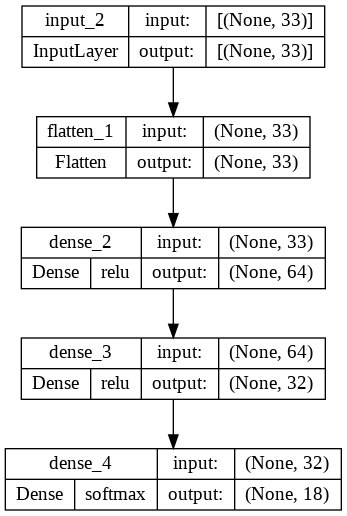

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(MAX_ORIG_TOKEN_LEN+2, )))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(MAX_UNIQUE_TAGS, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [28]:
train_labels_c = tf.keras.utils.to_categorical(train_labels, num_classes=MAX_UNIQUE_TAGS)
test_labels_c = tf.keras.utils.to_categorical(test_labels, num_classes=MAX_UNIQUE_TAGS)
print(train_labels_c.shape, train_inputs.shape)
model.fit(train_inputs, train_labels_c, validation_data=(test_inputs, test_labels_c), epochs=4)

(426182, 18) (426182, 33)
Epoch 1/4
13319/13319 [==============================] - 79s 6ms/step - loss: 1.2375 - accuracy: 0.5867 - val_loss: 1.0005 - val_accuracy: 0.6582
Epoch 2/4
13319/13319 [==============================] - 76s 6ms/step - loss: 0.9539 - accuracy: 0.6739 - val_loss: 0.9176 - val_accuracy: 0.6831
Epoch 3/4
13319/13319 [==============================] - 58s 4ms/step - loss: 0.8853 - accuracy: 0.6989 - val_loss: 0.8810 - val_accuracy: 0.7096
Epoch 4/4
13319/13319 [==============================] - 76s 6ms/step - loss: 0.8540 - accuracy: 0.7112 - val_loss: 0.8249 - val_accuracy: 0.7215


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 1)             92        
                                                                 
 flatten_2 (Flatten)         (None, 33)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                2176      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 18)                594       
                                                                 
Total params: 4,942
Trainable params: 4,942
Non-trainable params: 0
_________________________________________________________________


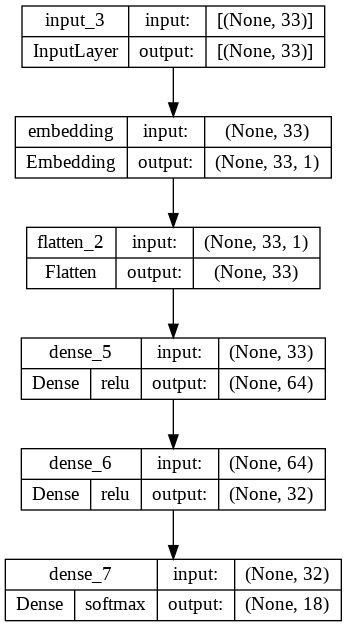

In [29]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(MAX_ORIG_TOKEN_LEN+2, )))

EMBSIZE = 1
model.add(tf.keras.layers.Embedding(MAX_UNIQUE_CHARS, EMBSIZE, input_length=MAX_ORIG_TOKEN_LEN+2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(MAX_UNIQUE_TAGS, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [30]:
train_labels_c = tf.keras.utils.to_categorical(train_labels, num_classes=MAX_UNIQUE_TAGS)
test_labels_c = tf.keras.utils.to_categorical(test_labels, num_classes=MAX_UNIQUE_TAGS)
print(train_labels_c.shape, train_inputs.shape)
model.fit(train_inputs, train_labels_c, validation_data=(test_inputs, test_labels_c), epochs=4)

(426182, 18) (426182, 33)
Epoch 1/4
13319/13319 [==============================] - 70s 5ms/step - loss: 1.1496 - accuracy: 0.5961 - val_loss: 0.9723 - val_accuracy: 0.6574
Epoch 2/4
13319/13319 [==============================] - 68s 5ms/step - loss: 0.9103 - accuracy: 0.6851 - val_loss: 0.8542 - val_accuracy: 0.7046
Epoch 3/4
13319/13319 [==============================] - 85s 6ms/step - loss: 0.8302 - accuracy: 0.7132 - val_loss: 0.7934 - val_accuracy: 0.7253
Epoch 4/4
13319/13319 [==============================] - 66s 5ms/step - loss: 0.7815 - accuracy: 0.7312 - val_loss: 0.7661 - val_accuracy: 0.7340


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 33, 8)             736       
                                                                 
 flatten_4 (Flatten)         (None, 264)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                16960     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 18)                594       
                                                                 
Total params: 20,370
Trainable params: 20,370
Non-trainable params: 0
_________________________________________________________________


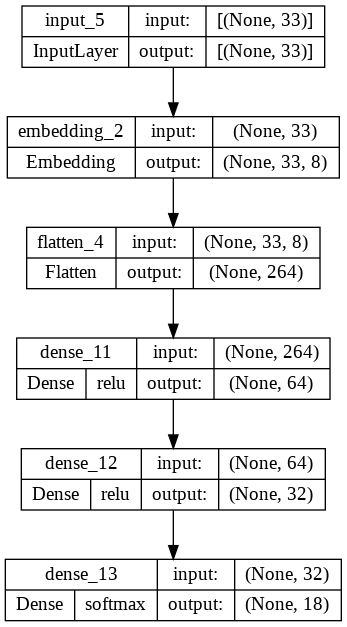

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(MAX_ORIG_TOKEN_LEN+2, )))

EMBSIZE = 8
model.add(tf.keras.layers.Embedding(MAX_UNIQUE_CHARS, EMBSIZE, input_length=MAX_ORIG_TOKEN_LEN+2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(MAX_UNIQUE_TAGS, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [34]:
train_labels_c = tf.keras.utils.to_categorical(train_labels, num_classes=MAX_UNIQUE_TAGS)
test_labels_c = tf.keras.utils.to_categorical(test_labels, num_classes=MAX_UNIQUE_TAGS)
print(train_labels_c.shape, train_inputs.shape)
model.fit(train_inputs, train_labels_c, validation_data=(test_inputs, test_labels_c), epochs=4)

(426182, 18) (426182, 33)
Epoch 1/4
13319/13319 [==============================] - 68s 5ms/step - loss: 0.6372 - accuracy: 0.7918 - val_loss: 0.3960 - val_accuracy: 0.8722
Epoch 2/4
13319/13319 [==============================] - 85s 6ms/step - loss: 0.3490 - accuracy: 0.8874 - val_loss: 0.3066 - val_accuracy: 0.8997
Epoch 3/4
13319/13319 [==============================] - 85s 6ms/step - loss: 0.2935 - accuracy: 0.9045 - val_loss: 0.2728 - val_accuracy: 0.9106
Epoch 4/4
13319/13319 [==============================] - 85s 6ms/step - loss: 0.2672 - accuracy: 0.9119 - val_loss: 0.2454 - val_accuracy: 0.9185


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 33, 8)             736       
                                                                 
 reshape_1 (Reshape)         (None, 33, 8, 1)          0         
                                                                 
 conv2d (Conv2D)             (None, 31, 6, 20)         200       
                                                                 
 flatten_5 (Flatten)         (None, 3720)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                238144    
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 18)               

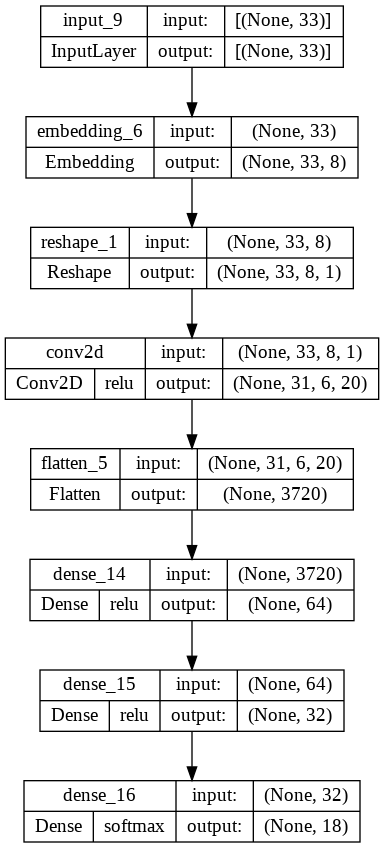

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(MAX_ORIG_TOKEN_LEN+2, )))
EMBSIZE = 8
model.add(tf.keras.layers.Embedding(MAX_UNIQUE_CHARS, EMBSIZE, input_length=MAX_ORIG_TOKEN_LEN+2))

model.add(tf.keras.layers.Reshape((MAX_ORIG_TOKEN_LEN+2, EMBSIZE, 1), input_shape=(MAX_ORIG_TOKEN_LEN+2, EMBSIZE, )))
model.add(tf.keras.layers.Conv2D(20, kernel_size=3, activation="relu"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(MAX_UNIQUE_TAGS, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [40]:
train_labels_c = tf.keras.utils.to_categorical(train_labels, num_classes=MAX_UNIQUE_TAGS)
test_labels_c = tf.keras.utils.to_categorical(test_labels, num_classes=MAX_UNIQUE_TAGS)
print(train_labels_c.shape, train_inputs.shape)
model.fit(train_inputs, train_labels_c, validation_data=(test_inputs, test_labels_c), epochs=4)

(426182, 18) (426182, 33)
Epoch 1/4
13319/13319 [==============================] - 85s 6ms/step - loss: 0.5313 - accuracy: 0.8258 - val_loss: 0.3023 - val_accuracy: 0.9008
Epoch 2/4
13319/13319 [==============================] - 79s 6ms/step - loss: 0.2634 - accuracy: 0.9130 - val_loss: 0.2169 - val_accuracy: 0.9275
Epoch 3/4
13319/13319 [==============================] - 79s 6ms/step - loss: 0.2083 - accuracy: 0.9293 - val_loss: 0.1896 - val_accuracy: 0.9343
Epoch 4/4
13319/13319 [==============================] - 99s 7ms/step - loss: 0.1819 - accuracy: 0.9373 - val_loss: 0.1701 - val_accuracy: 0.9423


In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(train_inputs, train_labels_c, validation_data=(test_inputs, test_labels_c), callbacks=[callback], epochs=1000)

Epoch 1/1000
13319/13319 [==============================] - 93s 7ms/step - loss: 0.1677 - accuracy: 0.9412 - val_loss: 0.1493 - val_accuracy: 0.9483
Epoch 2/1000
13319/13319 [==============================] - 79s 6ms/step - loss: 0.1565 - accuracy: 0.9446 - val_loss: 0.1426 - val_accuracy: 0.9488
Epoch 3/1000
13319/13319 [==============================] - 79s 6ms/step - loss: 0.1488 - accuracy: 0.9470 - val_loss: 0.1332 - val_accuracy: 0.9516
Epoch 4/1000
13319/13319 [==============================] - 78s 6ms/step - loss: 0.1375 - accuracy: 0.9501 - val_loss: 0.1287 - val_accuracy: 0.9523
Epoch 6/1000
13319/13319 [==============================] - 93s 7ms/step - loss: 0.1330 - accuracy: 0.9516 - val_loss: 0.1265 - val_accuracy: 0.9532
Epoch 7/1000
13319/13319 [==============================] - 79s 6ms/step - loss: 0.1293 - accuracy: 0.9524 - val_loss: 0.1273 - val_accuracy: 0.9531
Epoch 8/1000
13319/13319 [==============================] - 93s 7ms/step - loss: 0.1265 - accuracy: 0.9533